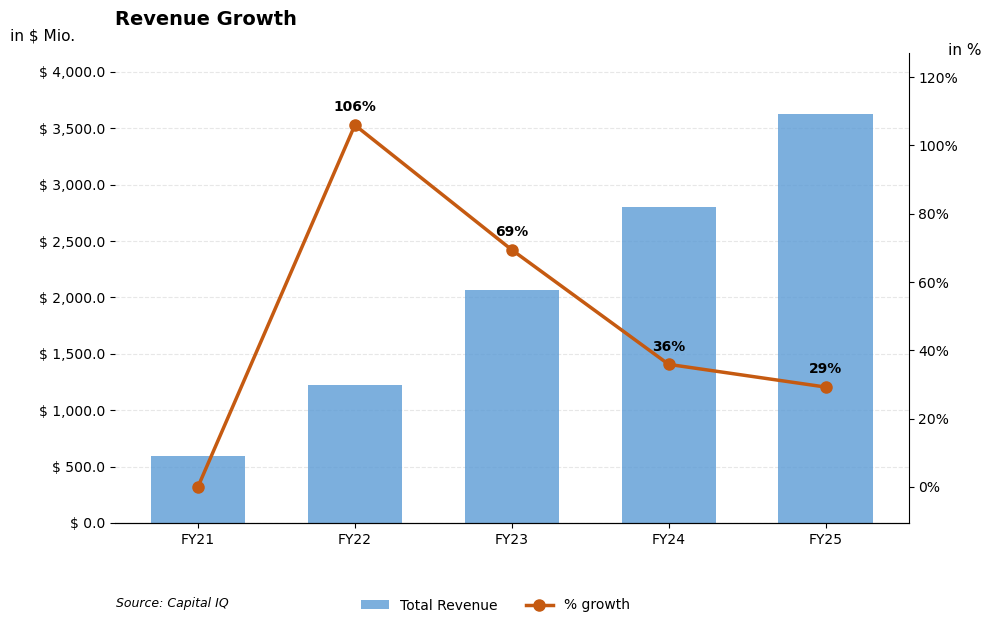

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = ['FY21', 'FY22', 'FY23', 'FY24', 'FY25']
revenue = [592, 1219.3, 2065.7, 2806.5, 3626.4]

# Calculate percent growth year-over-year
growth = [0]  # First year has no prior year for comparison
for i in range(1, len(revenue)):
    pct_change = ((revenue[i] - revenue[i-1]) / revenue[i-1]) * 100
    growth.append(pct_change)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bars
bars = ax1.bar(years, revenue, color='#5B9BD5', alpha=0.8, width=0.6)

# Create second y-axis for growth percentage
ax2 = ax1.twinx()

# Plot line
line = ax2.plot(years, growth, color='#C55A11', 
                marker='o', linewidth=2.5, markersize=8, label='% growth')

# Add percentage labels on the line
for i, (year, g) in enumerate(zip(years, growth)):
    if i > 0:  # Skip first year (0% growth)
        ax2.annotate(f'{g:.0f}%', 
                    xy=(i, g), 
                    xytext=(0, 10), 
                    textcoords='offset points',
                    ha='center',
                    fontsize=10,
                    fontweight='bold')

# Set labels and title
ax1.set_xlabel('', fontsize=11)
ax1.set_ylabel('in $ Mio.', fontsize=11, rotation=0, ha='right')
ax1.yaxis.set_label_coords(-0.05, 1.02)
ax1.set_title('Revenue Growth', fontsize=14, fontweight='bold', loc='left', pad=20)

# Format y-axes
ax1.set_ylim(0, max(revenue) * 1.15)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'$ {x:,.1f}'))
ax2.set_ylabel('in %', fontsize=11, rotation=0, ha='left')
ax2.yaxis.set_label_coords(1.05, 1.02)

# Adjust y-axis to account for all growth values
min_growth = min(growth)
max_growth = max(growth)
y_range = max_growth - min_growth
ax2.set_ylim(min_growth - y_range * 0.1, max_growth + y_range * 0.2)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# Remove borders (spines) - keep right border for second y-axis
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Grid
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# Legend below the chart
fig.legend([bars, line[0]], ['Total Revenue', '% growth'], 
          loc='lower center', bbox_to_anchor=(0.5, -0.05), 
          ncol=2, frameon=False, fontsize=10)

# Add source
fig.text(0.12, -0.02, 'Source: Capital IQ', fontsize=9, style='italic')

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()